In [1]:
import pandas as pd

df = pd.read_csv("stats.csv", sep = ",", header=0)

df.info()

df = df[df['aces'].notna()]
df = df[df['sets'].notna()]
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20240 entries, 0 to 20239
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   match_id              20240 non-null  object 
 1   player_id             20240 non-null  object 
 2   pts                   14398 non-null  float64
 3   rank                  20230 non-null  float64
 4   winner                20240 non-null  bool   
 5   sets                  20236 non-null  float64
 6   1                     20236 non-null  float64
 7   2                     20107 non-null  float64
 8   3                     19818 non-null  float64
 9   4                     9898 non-null   float64
 10  5                     3724 non-null   float64
 11  avg_odds              9852 non-null   float64
 12  max_odds              9852 non-null   float64
 13  total_pts             20234 non-null  float64
 14  service_pts           20234 non-null  float64
 15  return_pts         

In [2]:
df.describe()

,pts,rank,sets,1,2,3,4,5,avg_odds,max_odds,...,service_pts,return_pts,aces,bp_saved,bp_faced,first_serve_rtn_won,second_serve_rtn_won,first_serve_in,dbl_faults,first_serve_per
count,14392.000000,20222.000000,20232.000000,20230.000000,20103.000000,19814.000000,9898.000000,3724.000000,9848.000000,9848.000000,...,20232.000000,20232.000000,20232.000000,20232.000000,20232.000000,20232.000000,20232.000000,20232.000000,20232.000000,20231.000000
mean,1755.402168,68.778261,1.806940,4.917647,4.867681,4.788735,4.827238,5.189581,3.495570,13.336711,...,70.492685,40.997331,8.724249,5.773082,9.549674,19.419187,21.578144,67.803727,4.219108,0.608173
std,2311.564442,84.671465,1.274377,1.802372,1.813595,1.877913,1.874796,2.918729,4.078319,603.648946,...,22.815378,15.232734,6.931579,3.906786,5.490593,8.902455,9.050325,22.461557,3.012928,0.074881
min,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.010000,1.010000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000
25%,575.000000,19.000000,0.000000,4.000000,3.000000,3.000000,3.000000,3.000000,1.260000,1.310000,...,55.000000,30.000000,4.000000,3.000000,5.000000,13.000000,15.000000,52.000000,2.000000,0.558442
50%,917.500000,49.000000,2.000000,6.000000,6.000000,6.000000,6.000000,6.000000,1.890000,2.020000,...,68.000000,41.000000,7.000000,5.000000,9.000000,19.000000,21.000000,65.000000,4.000000,0.608434
75%,1755.000000,91.000000,3.000000,6.000000,6.000000,6.000000,6.000000,6.000000,3.800000,4.300000,...,85.000000,51.000000,12.000000,8.000000,13.000000,25.000000,27.000000,81.000000,6.000000,0.657534
max,16950.000000,1441.000000,3.000000,7.000000,7.000000,7.000000,7.000000,70.000000,36.440000,42586.000000,...,385.000000,117.000000,113.000000,25.000000,34.000000,69.000000,61.000000,361.000000,26.000000,1.000000


In [5]:
# Moda, mediana, desviació estàndar i mitjana
import numpy as np
import statistics

print(statistics.mode(df['sets']))
print(df['sets'].median())
print(round(np.sqrt(df['sets'].var()),2))
print(round(df['sets'].mean(),2))      


3.0
2.0
1.27
1.81


In [6]:
# Correlació
df['rank'].astype('category')
np.corrcoef(df['sets'], df['first_serve_rtn_won']).round(2)



array([[1.  , 0.55],
       [0.55, 1.  ]])

<AxesSubplot:>

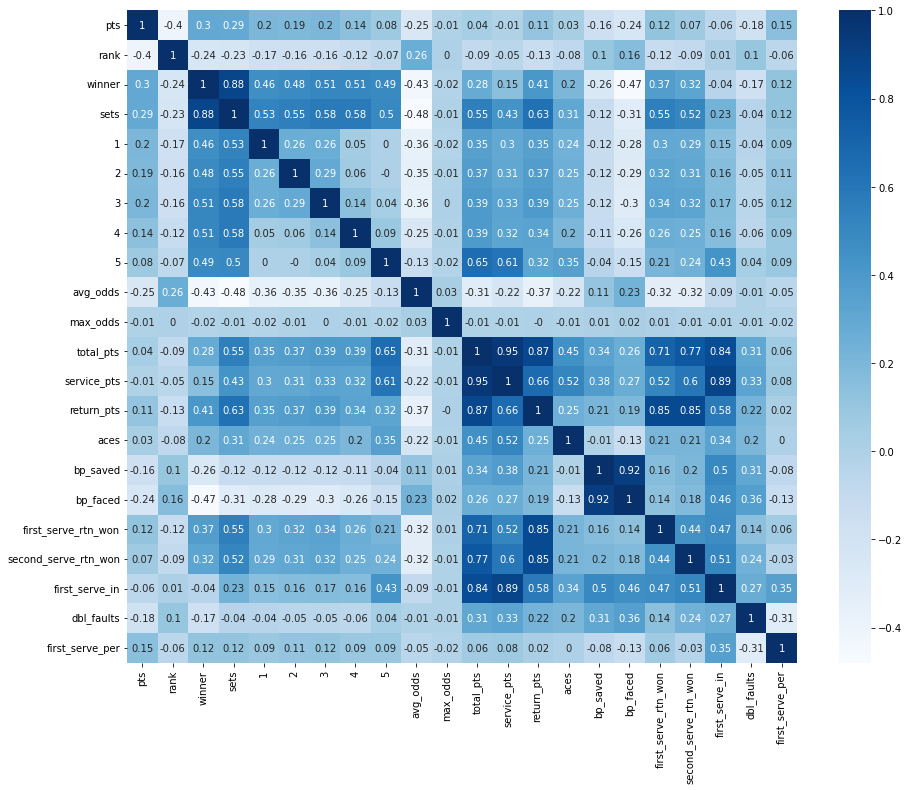

In [7]:
#Correclació de tots els atributs de les dades

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

dadescor = df.corr().round(2)
plt.figure(figsize=(15,12))
sns.heatmap(dadescor, annot=True, cmap="Blues")


In [8]:
# Mitjana harmònica i geomètrica sense valors 0 
from scipy.stats import hmean
from scipy.stats.mstats import gmean


x_new = [i for i in df['service_pts'] if i != 0]
    
print("La mitjana harmònica dels punts de servei és", np.round(hmean(x_new),2))
print("La mitjana geomètrica dels punts de servei és", round(gmean(x_new), 1))

La mitjana harmònica dels punts de servei és 60.79
La mitjana geomètrica dels punts de servei és 66.5
